In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

import astropy.units as u
import matplotlib as mpl
import sys 
sys.path.append("..")
from plot_OpSims import plot_OpSims_color_excess_redshift_extremes

In [3]:
# import maf python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

In [4]:
# import convenience functions
import sys 
sys.path.append("../../LSST_OpSim")
from Scripts_NBs.opsimUtils import *

## Load the results
We first load the results of the run into memory. We will read jointly the FBS v1.5 and FBS v1.6 results, and will differentiate at the time of plotting.

In [5]:
NSIDE=64
your_username = "rjassef"
folder_mafoutput = "Color_EM5_{0:d}".format(NSIDE)
resultDbPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}'.format(
    your_username, folder_mafoutput)
metricDataPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}/MetricData/'.format(
    your_username, folder_mafoutput)

In [6]:
# get a dictionary of resultDb from given directory
resultDbs = getResultsDbs(resultDbPath)

In [7]:
# retrieve metricBundles for each opsim run and store them in a dictionary
bundleDicts_raw = dict()
for runName in resultDbs:
    bundleDicts_raw[runName] = bundleDictFromDisk(resultDbs[runName], runName, metricDataPath)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

In [8]:
#Rearrange the bundleDicts_raw dictionary so that the keys are always the same as for the first run.
dbRuns = list(bundleDicts_raw.keys())
Keys = list(bundleDicts_raw[dbRuns[0]].keys())
bundleDicts = dict()
for runName in dbRuns:
    bundleDicts[runName] = dict()
    Keys_raw = bundleDicts_raw[runName]
    for Key in Keys:
        for Key_raw in Keys_raw:
            if Key[1]==Key_raw[1]:
                bundleDicts[runName][Key] = bundleDicts_raw[runName][Key_raw]

In [9]:
# check keys
bd_keys = list(bundleDicts[dbRuns[15]].keys())
print(bd_keys, len(list(bundleDicts.keys())), len(list(bundleDicts_raw.keys())))
print(Keys)

[(1, 'Exgalm5_color_with_cuts_AGN_ug_mean'), (2, 'Exgalm5_color_with_cuts_AGN_gr_mean'), (3, 'Exgalm5_color_with_cuts_AGN_ri_mean'), (4, 'Exgalm5_color_with_cuts_AGN_iz_mean'), (5, 'Exgalm5_color_with_cuts_AGN_zy_mean')] 190 190
[(1, 'Exgalm5_color_with_cuts_AGN_ug_mean'), (2, 'Exgalm5_color_with_cuts_AGN_gr_mean'), (3, 'Exgalm5_color_with_cuts_AGN_ri_mean'), (4, 'Exgalm5_color_with_cuts_AGN_iz_mean'), (5, 'Exgalm5_color_with_cuts_AGN_zy_mean')]


In [10]:
#Make sure that the plots folder exists. 
plots_folder = "redshift_plots_all_opsims_extremes_{0:d}".format(NSIDE)
if not os.path.exists(plots_folder):
    os.mkdir(plots_folder)

## Assef et el. (2010) AGN template colors

In [11]:
zmin = 0
zmax = 6
dz = 0.1
zs = np.arange(zmin, zmax, dz)

filterdist_indx3_v1.5_10yrs -1.613389430005281
u_long_ms_60_v1.7_10yrs -0.6651000828326232
short_exp_5ns_1expt_v1.5_10yrs -0.21169655937803178
filterdist_indx1_v1.5_10yrs 0.440351699974757
filterdist_indx6_v1.5_10yrs 0.30514043924046064
ss_heavy_v1.6_10yrs 0.5791144304611056
filterdist_indx5_v1.5_10yrs 0.46426017492539984
filterdist_indx6_v1.5_10yrs 0.8632375910633634
twilight_neo_mod1_v1.5_10yrs 0.34609045426610585
var_expt_v1.5_10yrs 0.8367989422253181


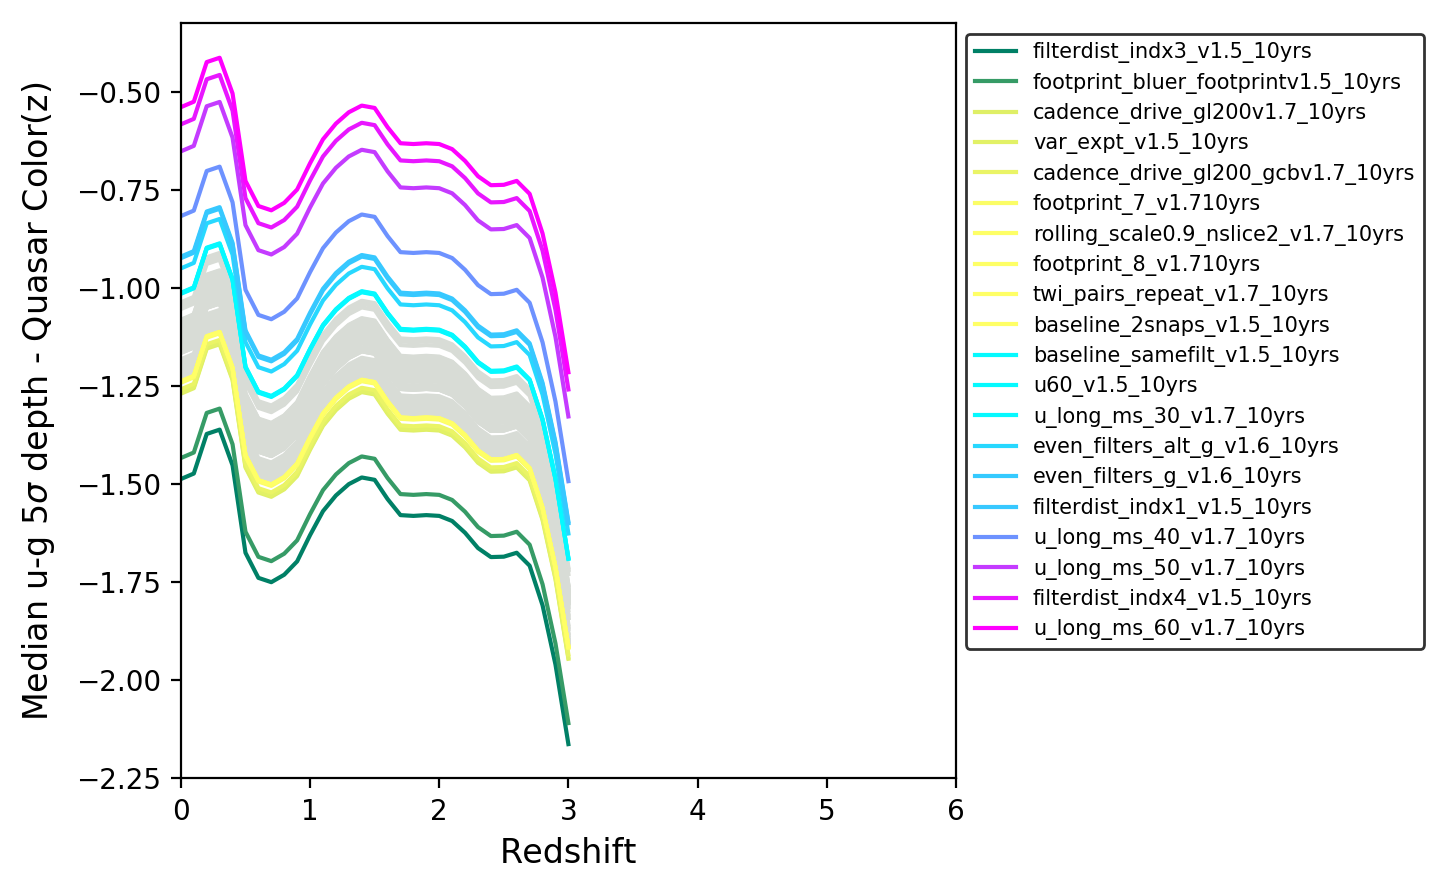

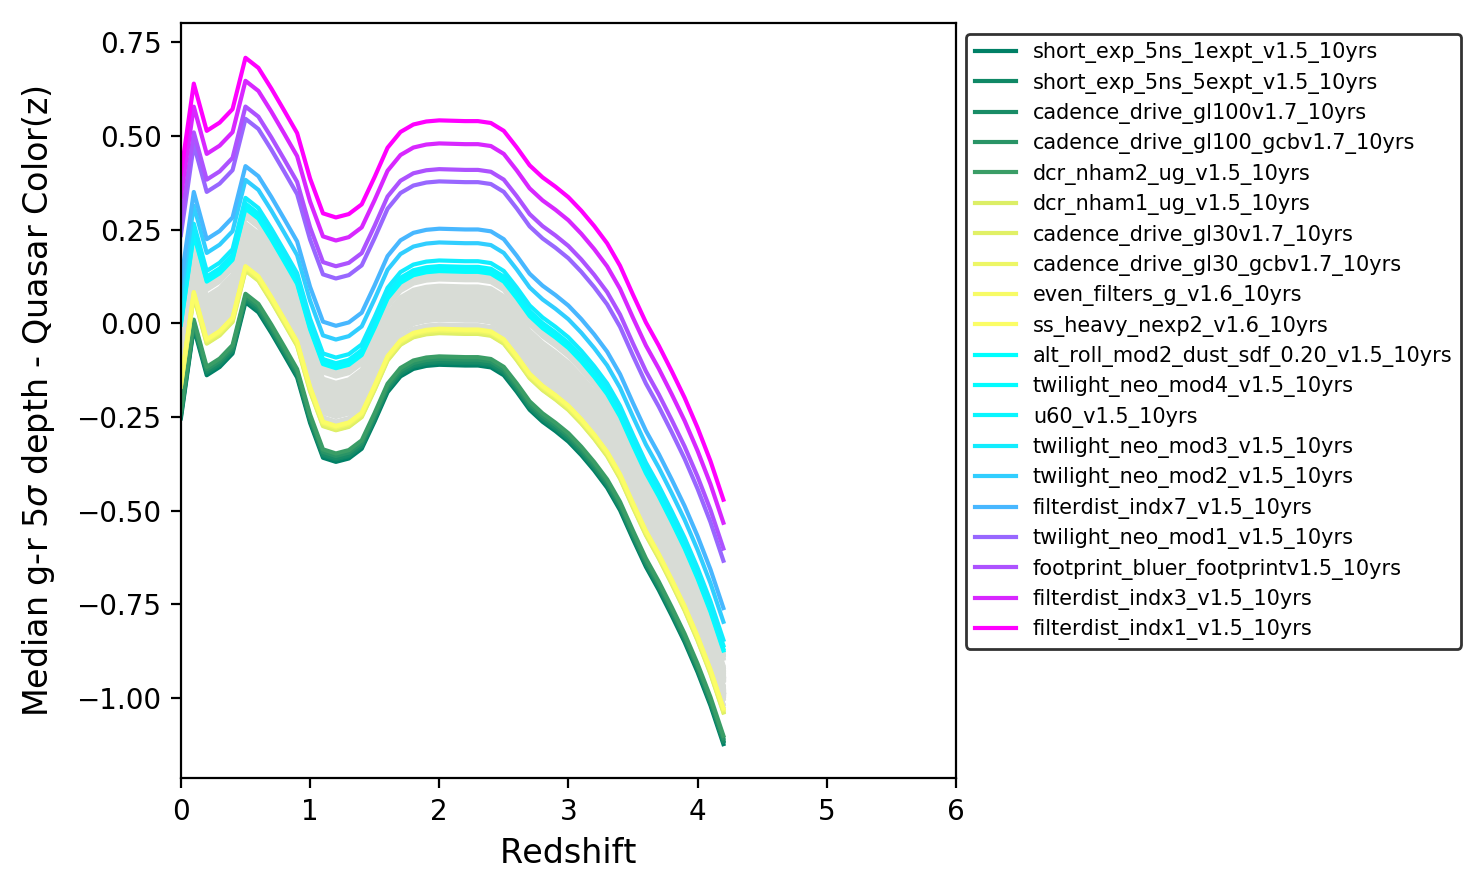

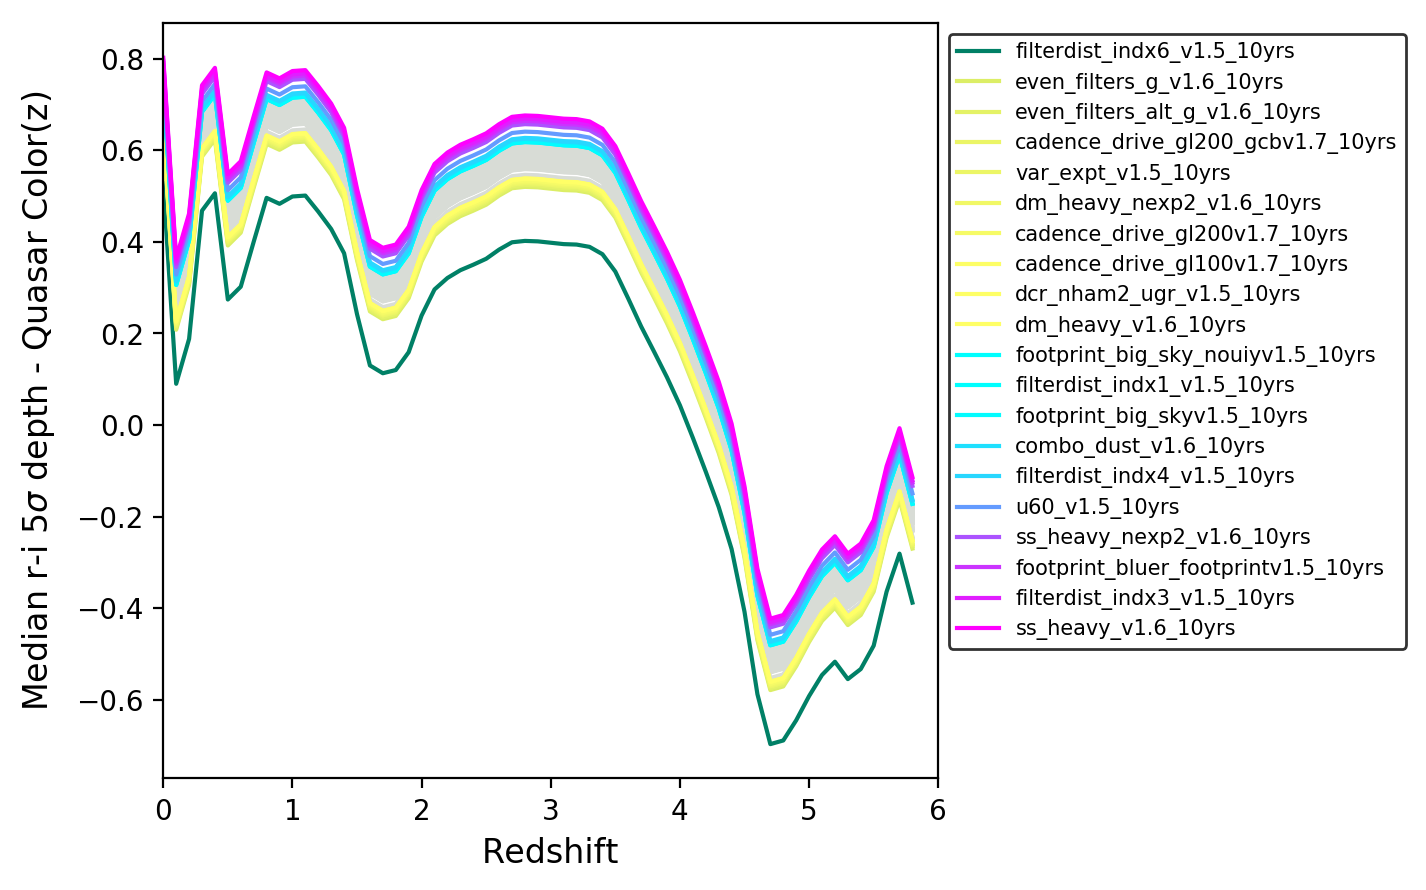

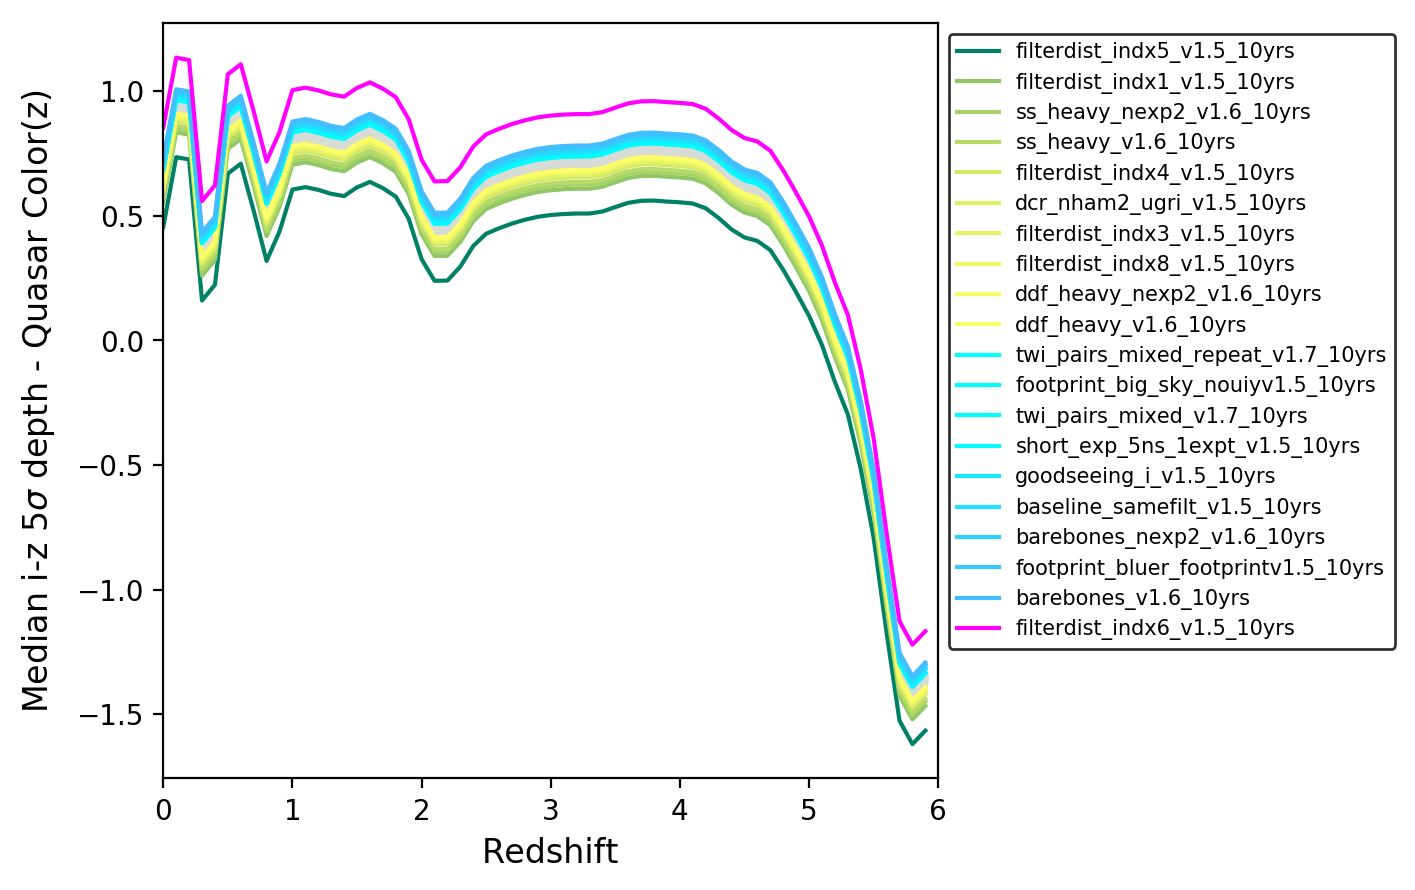

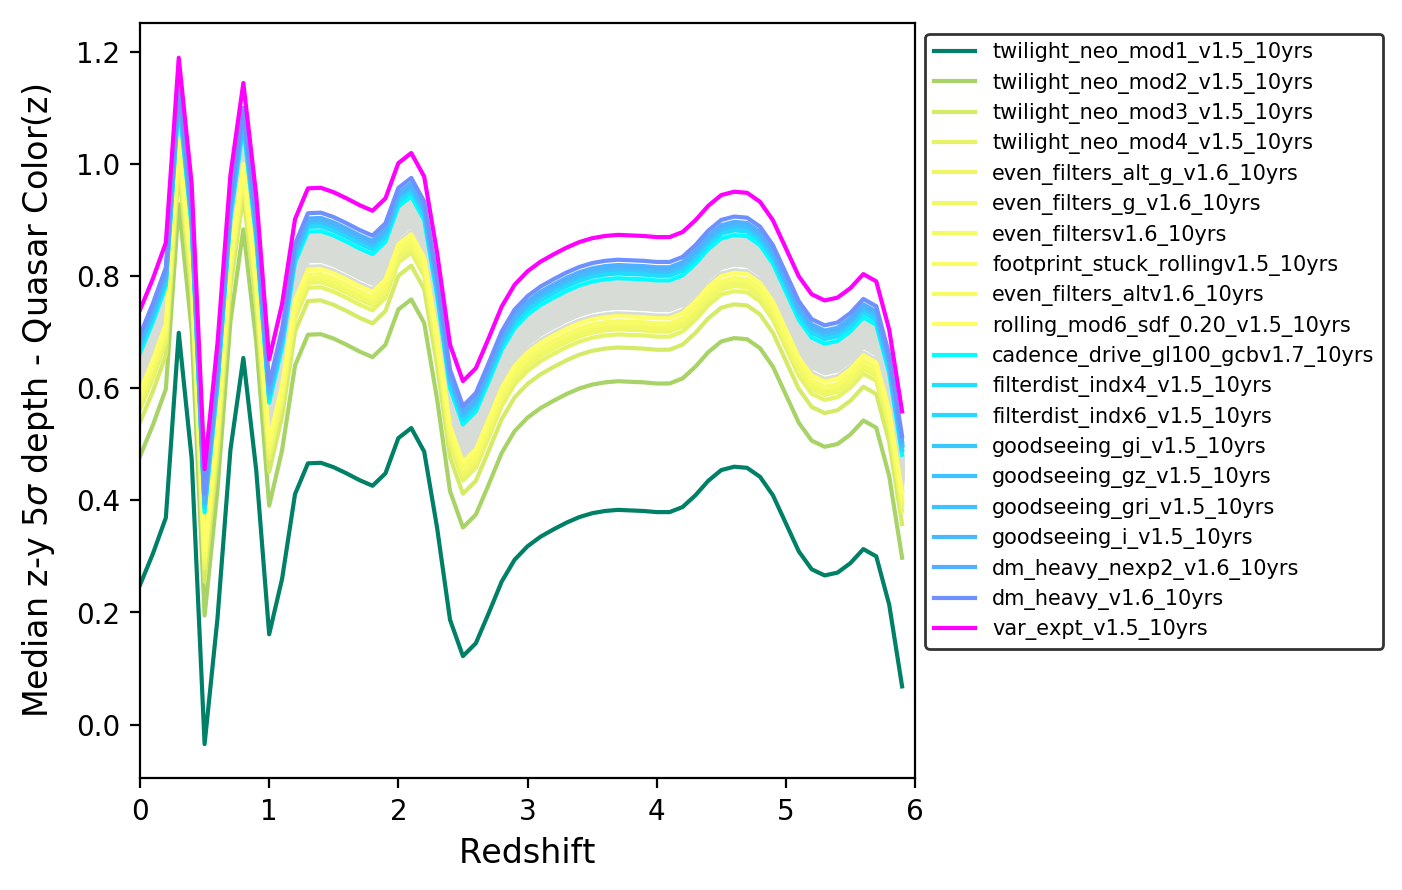

In [12]:
from quasar_colors.quasar_colors import Assef10_colors
for Key in Keys:
    filter1 = Key[1][-7]
    filter2 = Key[1][-6]
    color_name = "{0}-{1}".format(filter1, filter2)
    quasar_colors = Assef10_colors(color_name,zs)
    ylabel = 'Median {} 5$\sigma$ depth - Quasar Color(z)'.format(color_name)
    plot_OpSims_color_excess_redshift_extremes(Key, bundleDicts, zs, quasar_colors,
                                               color_map_top=mpl.cm.cool,
                                               color_map_bottom=mpl.cm.summer,
                                               ylabel=ylabel, figsize=(5,5), 
                                               dpi=200, datamin=zmin, datamax=zmax,
                                               percentile=5)
    plot_fname = "{0}/Color_{1}{2}_Assef10.png".format(plots_folder,filter1,filter2)
    plt.savefig(plot_fname, dpi=200, bbox_inches='tight')

## Matthew Temple's AGN Color models

In [13]:
from quasar_colors.quasar_colors import Temple_colors

### i = 21.5

filterdist_indx3_v1.5_10yrs -1.613389430005281
u_long_ms_60_v1.7_10yrs -0.6651000828326232
short_exp_5ns_1expt_v1.5_10yrs -0.21169655937803178
filterdist_indx1_v1.5_10yrs 0.440351699974757
filterdist_indx6_v1.5_10yrs 0.30514043924046064
ss_heavy_v1.6_10yrs 0.5791144304611056
filterdist_indx5_v1.5_10yrs 0.46426017492539984
filterdist_indx6_v1.5_10yrs 0.8632375910633634
twilight_neo_mod1_v1.5_10yrs 0.34609045426610585
var_expt_v1.5_10yrs 0.8367989422253181


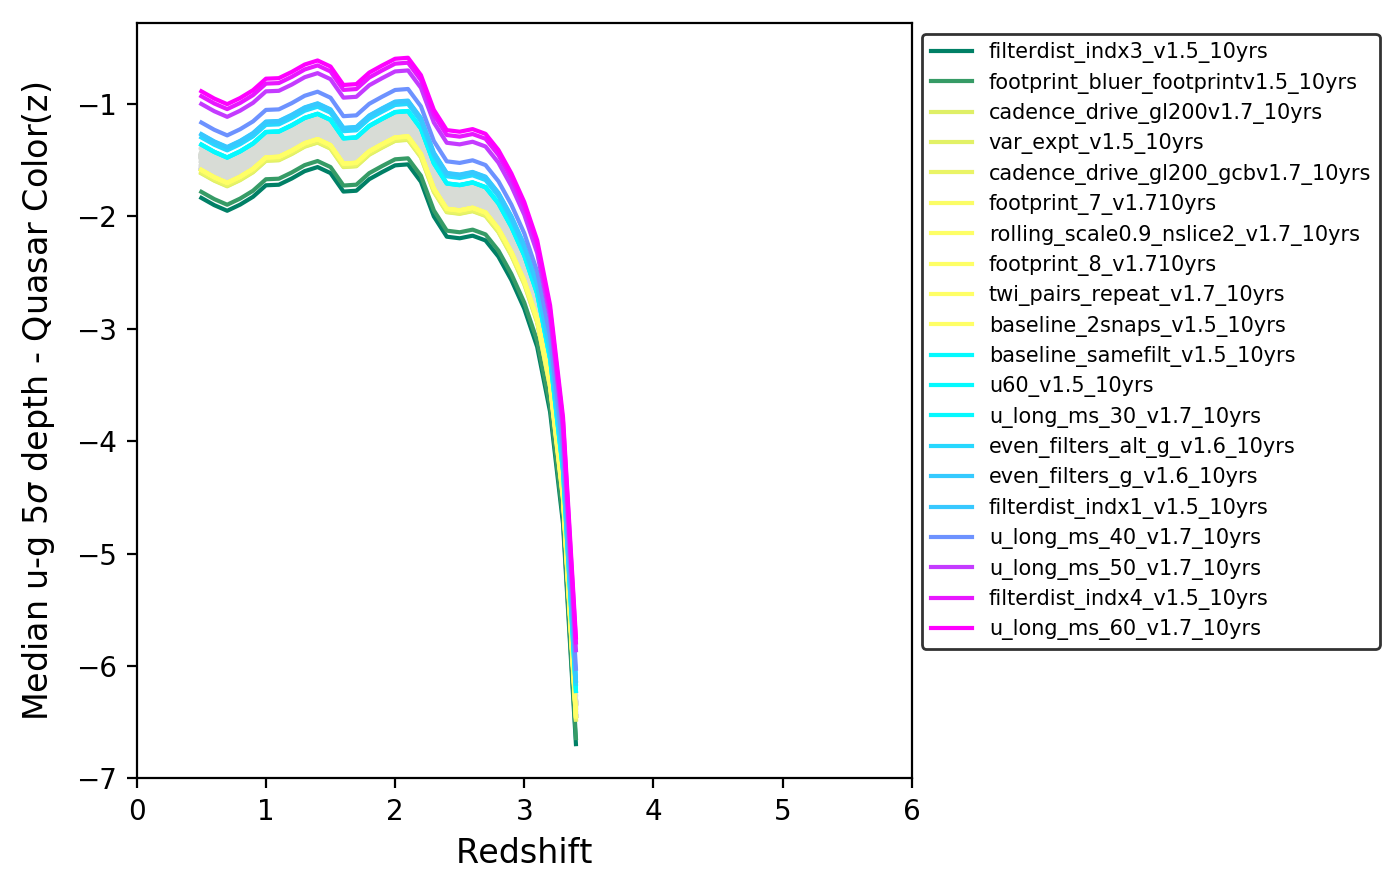

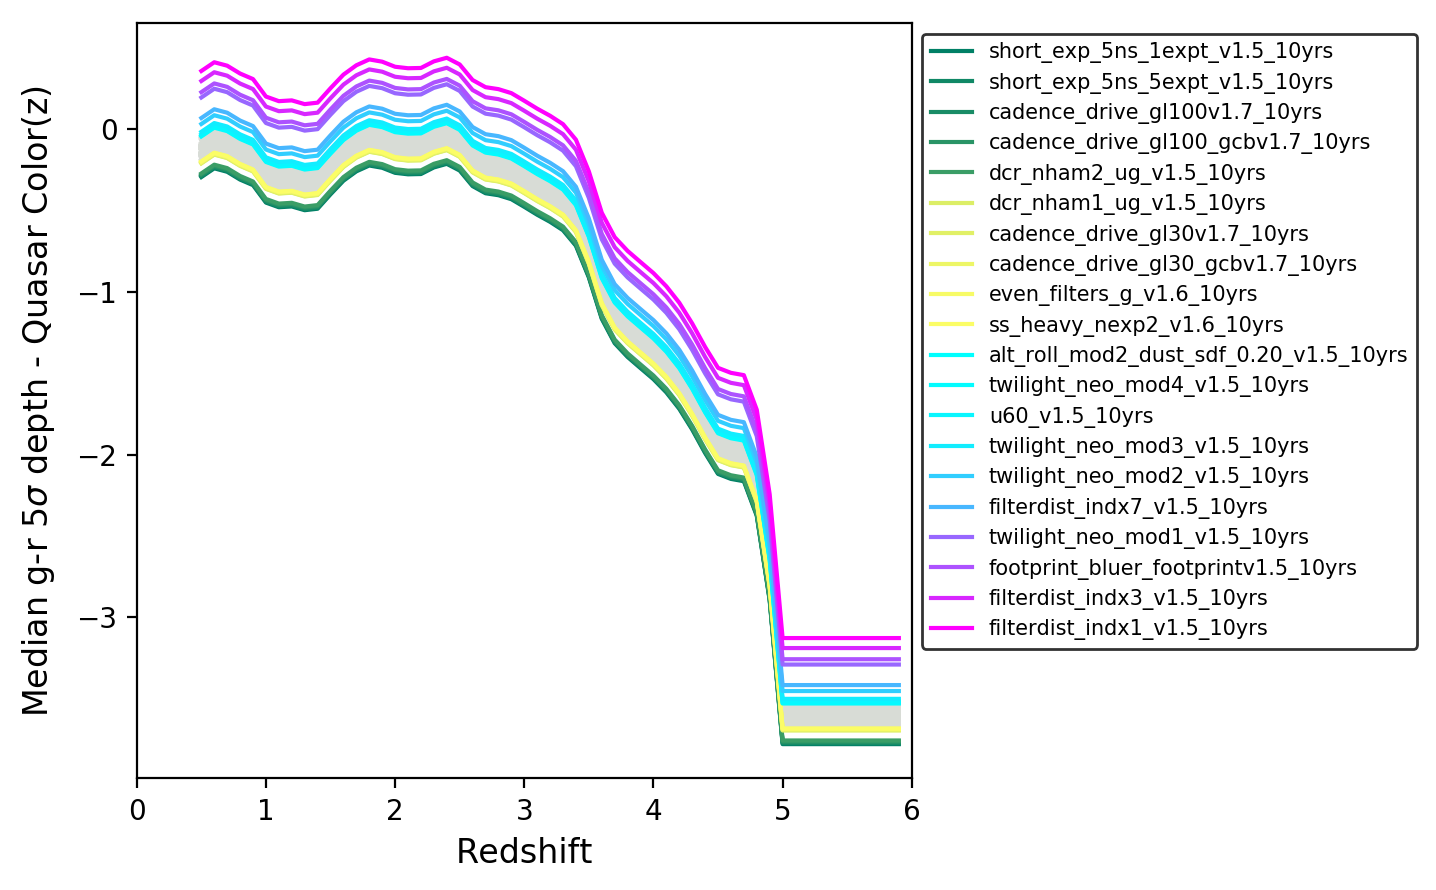

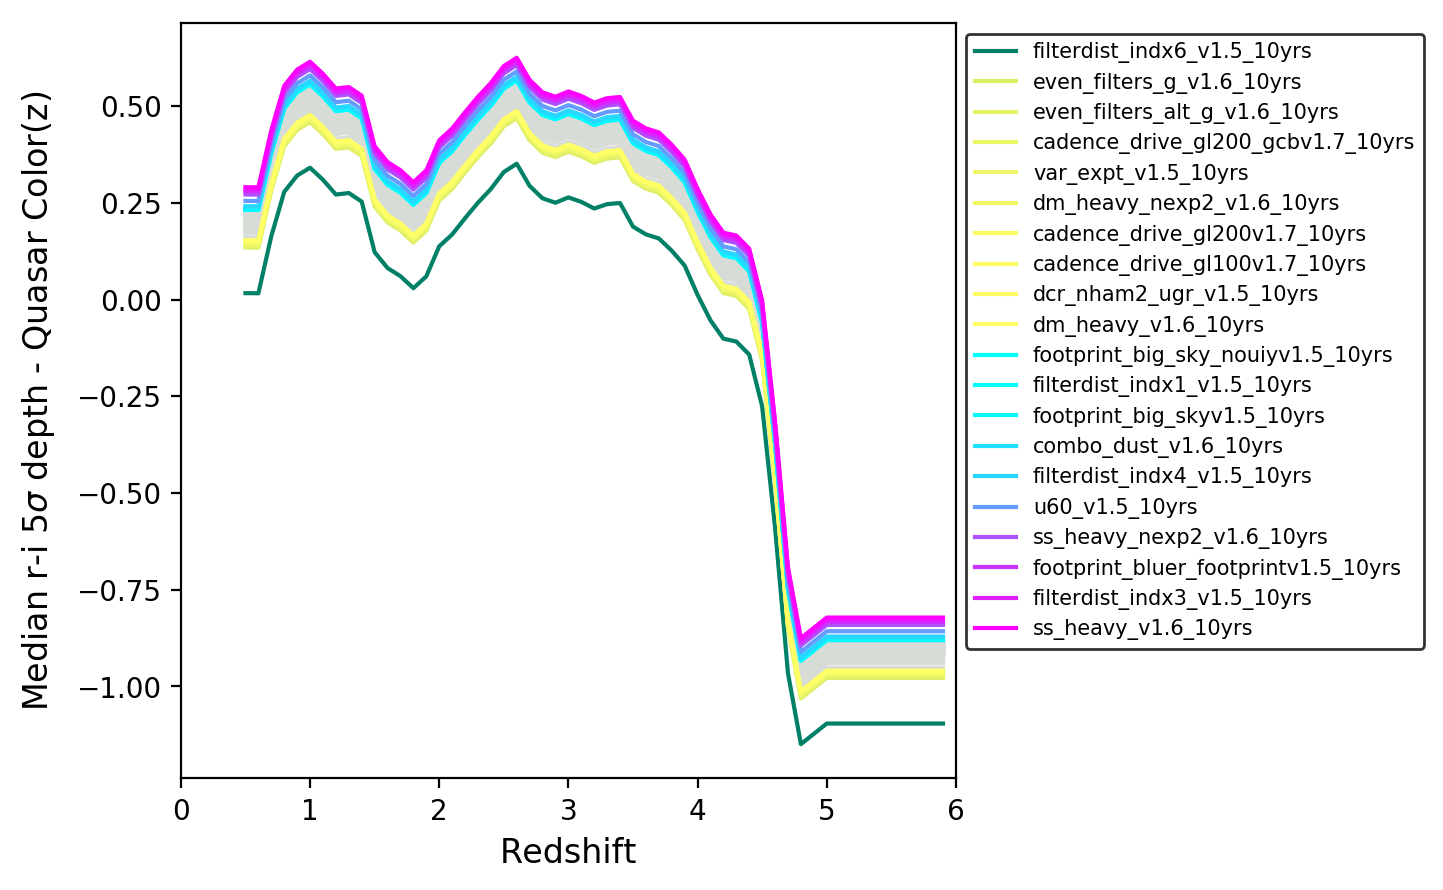

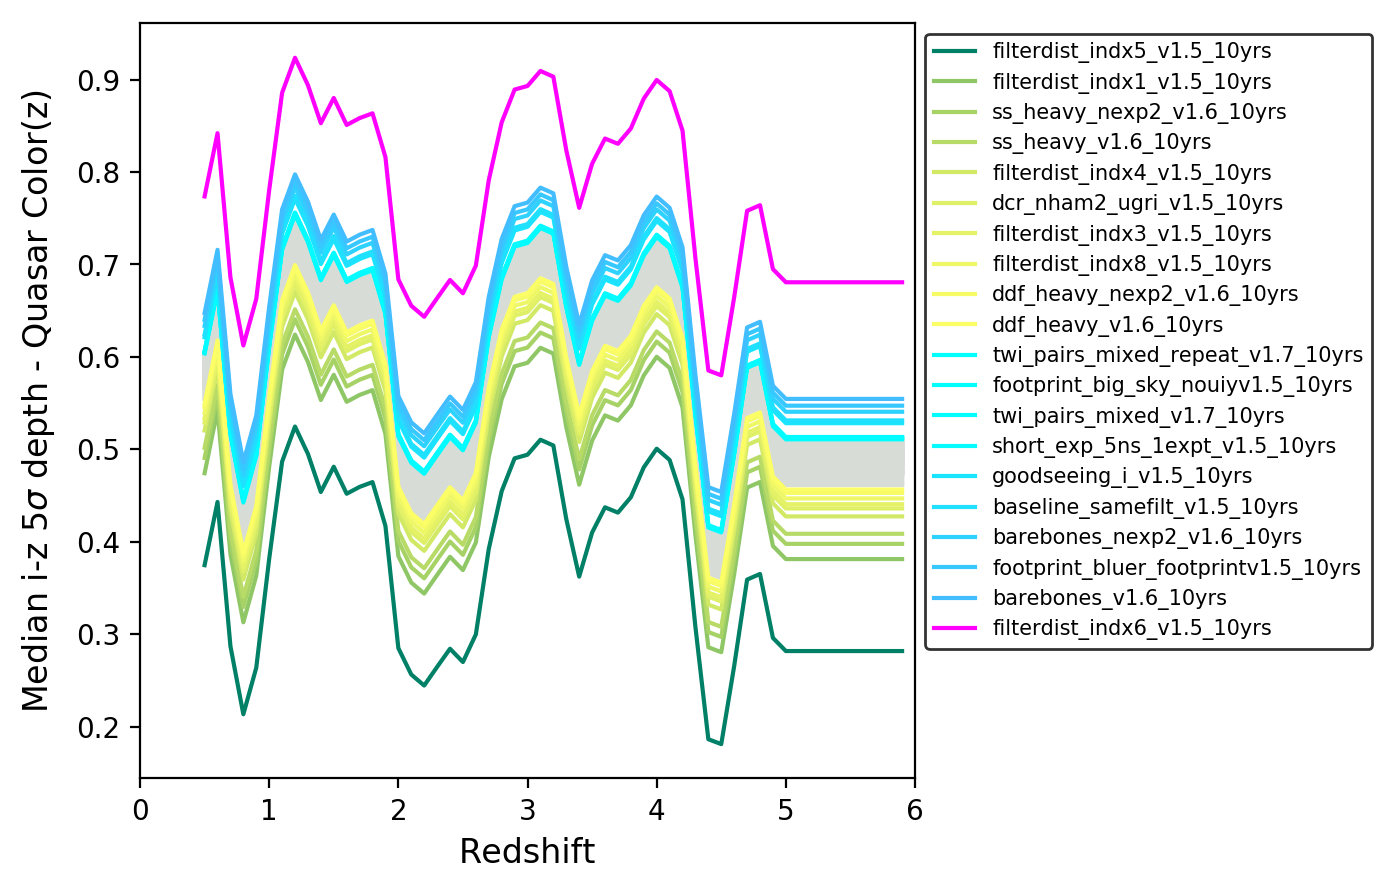

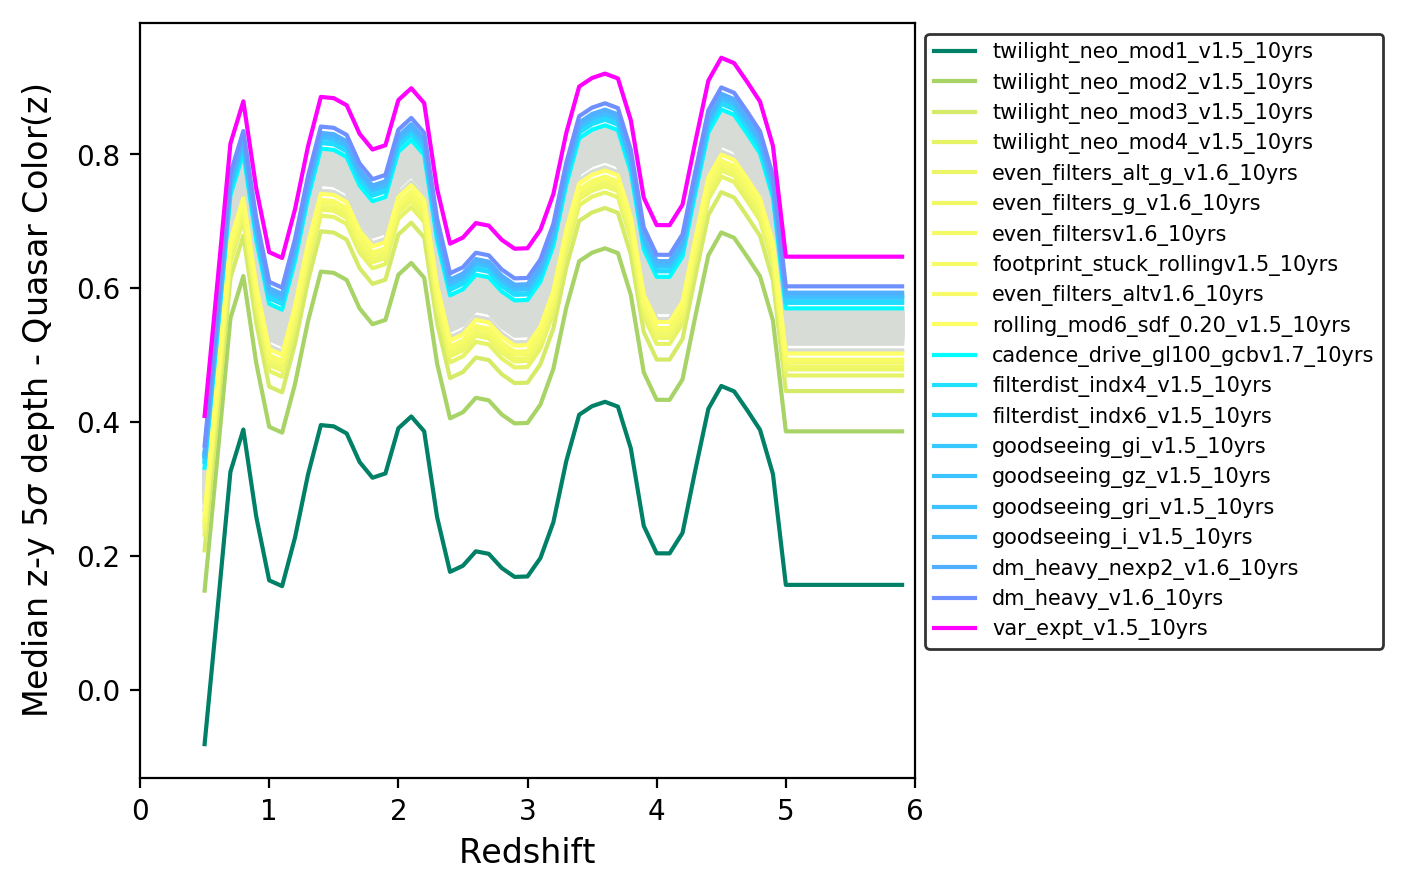

In [14]:
imag = 21.5
for Key in Keys:
    filter1 = Key[1][-7]
    filter2 = Key[1][-6]
    color_name = "{0}-{1}".format(filter1, filter2)
    quasar_colors = Temple_colors(color_name,zs,imag)
    ylabel = 'Median {} 5$\sigma$ depth - Quasar Color(z)'.format(color_name)
    plot_OpSims_color_excess_redshift_extremes(Key, bundleDicts, zs, quasar_colors,
                                               color_map_top=mpl.cm.cool,
                                               color_map_bottom=mpl.cm.summer,
                                               ylabel=ylabel, figsize=(5,5), 
                                               dpi=200, datamin=zmin, datamax=zmax,
                                               percentile=5)
    plot_fname = "{0}/Color_{1}{2}_imag{3}_Temple.png".format(plots_folder,filter1,filter2,imag)
    plt.savefig(plot_fname, dpi=200, bbox_inches='tight')

### i = 24.5

filterdist_indx3_v1.5_10yrs -1.613389430005281
u_long_ms_60_v1.7_10yrs -0.6651000828326232
short_exp_5ns_1expt_v1.5_10yrs -0.21169655937803178
filterdist_indx1_v1.5_10yrs 0.440351699974757
filterdist_indx6_v1.5_10yrs 0.30514043924046064
ss_heavy_v1.6_10yrs 0.5791144304611056
filterdist_indx5_v1.5_10yrs 0.46426017492539984
filterdist_indx6_v1.5_10yrs 0.8632375910633634
twilight_neo_mod1_v1.5_10yrs 0.34609045426610585
var_expt_v1.5_10yrs 0.8367989422253181


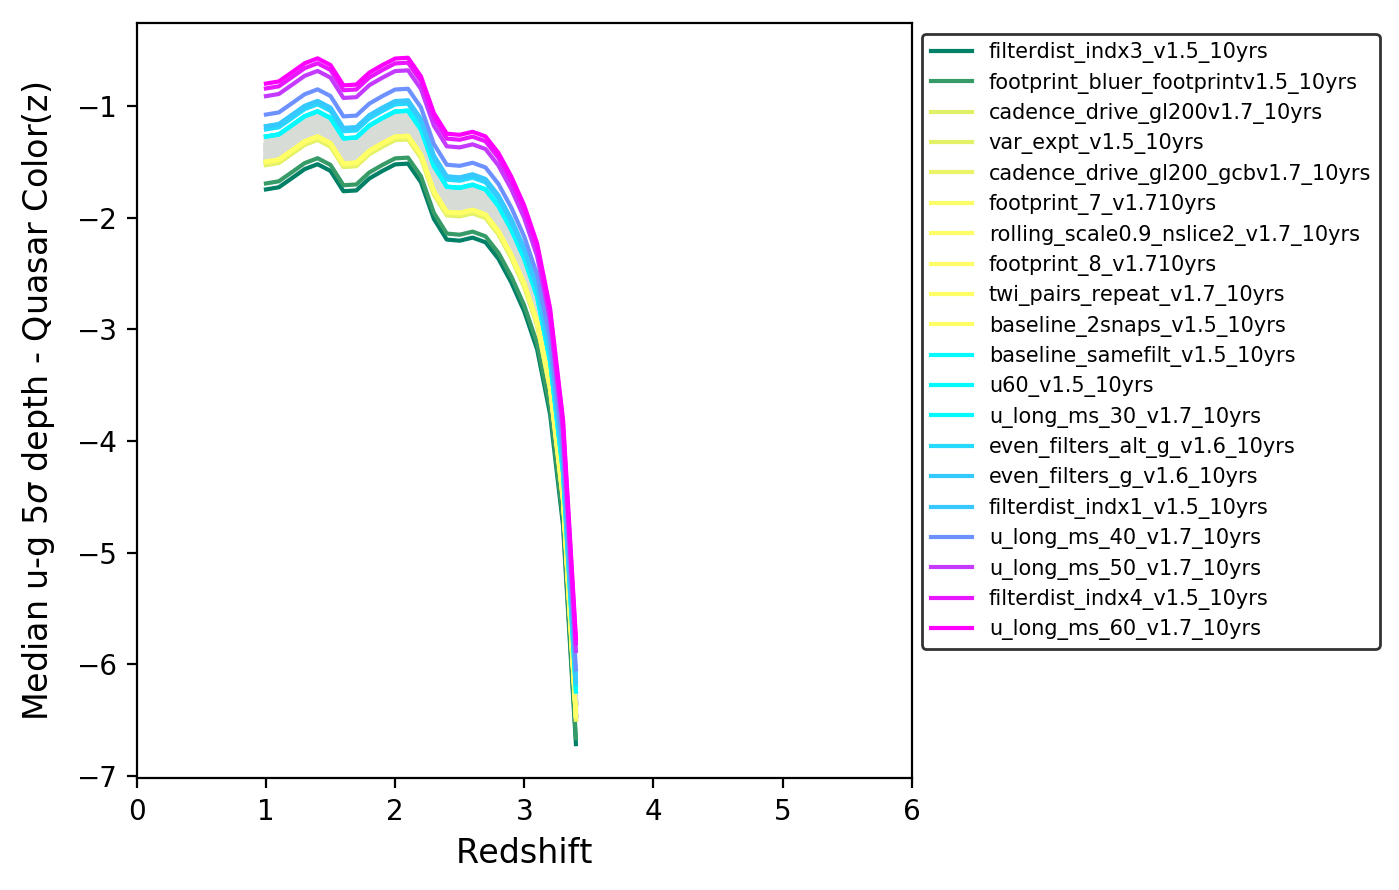

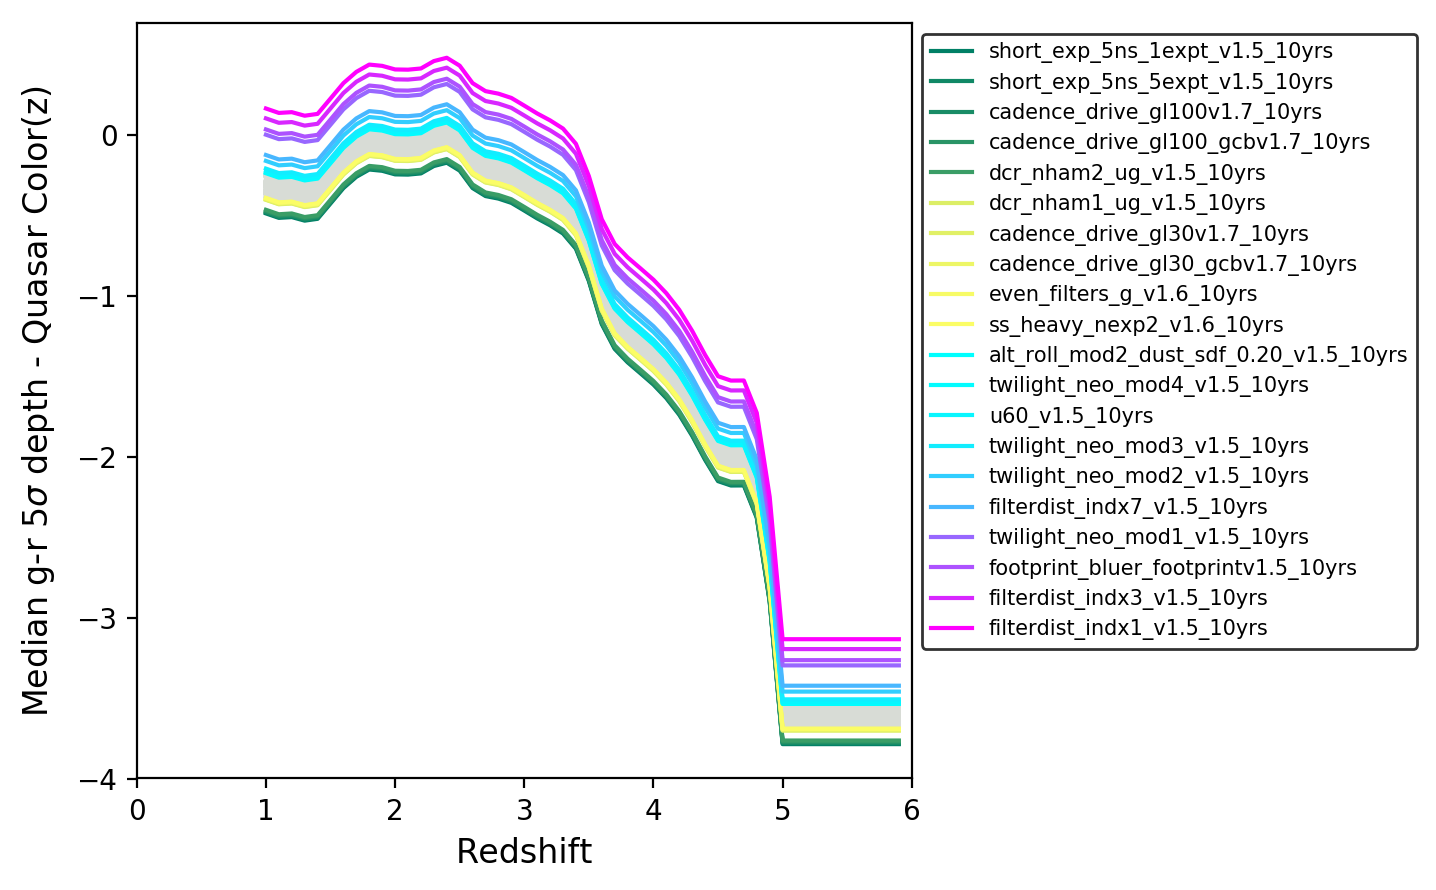

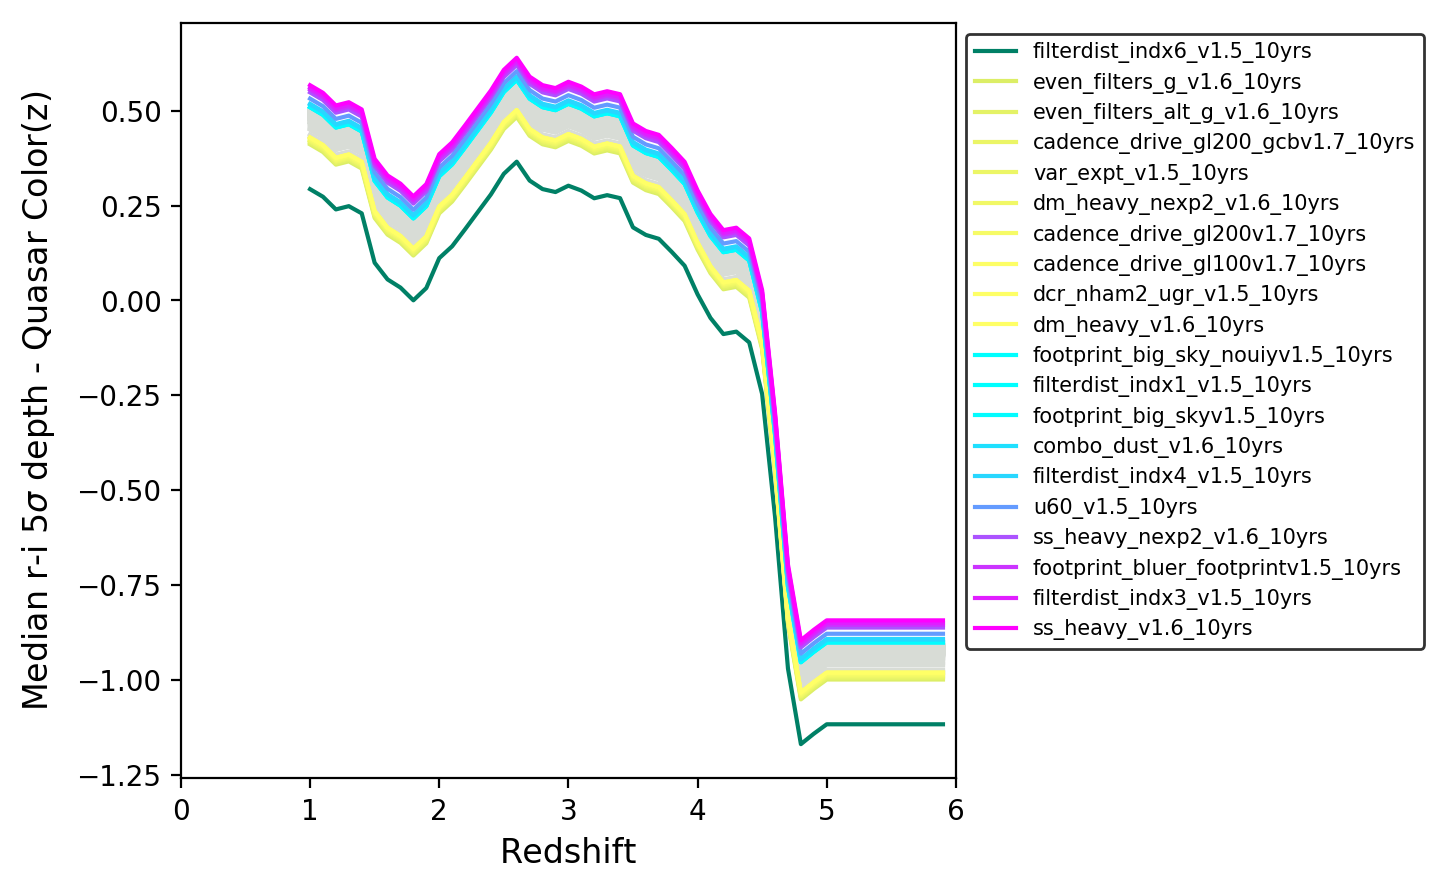

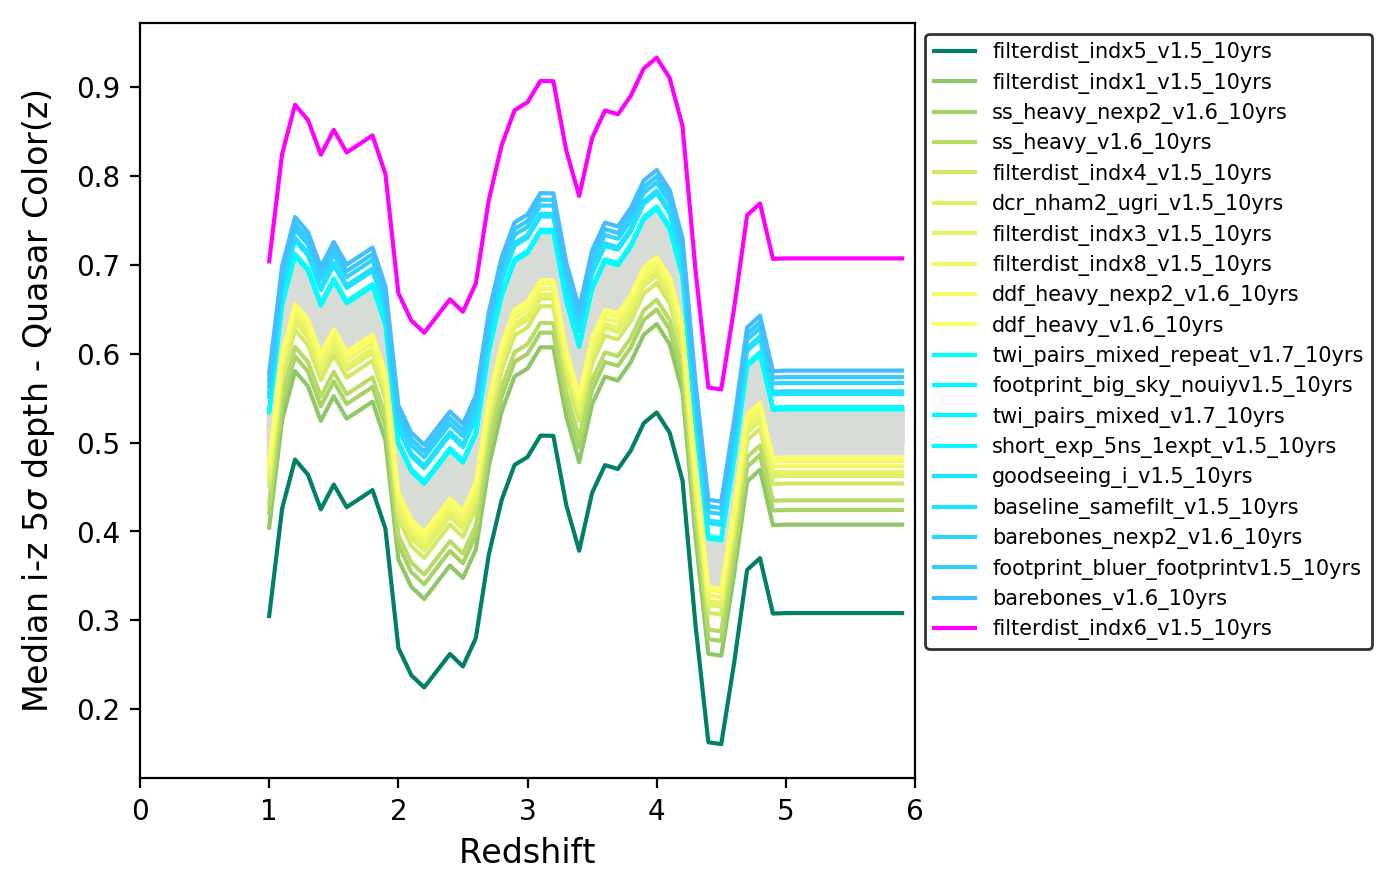

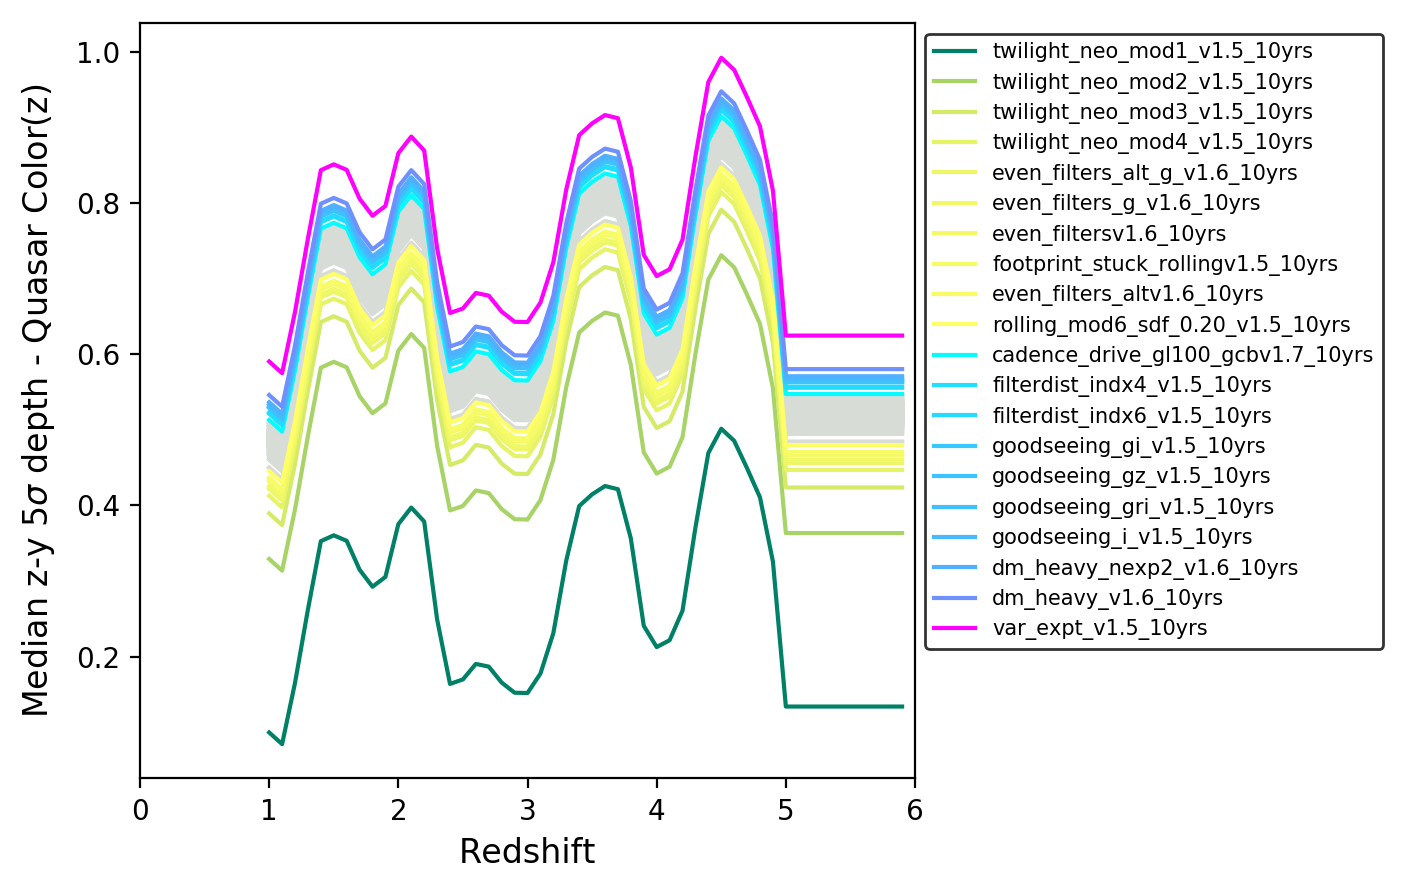

In [15]:
imag = 24.5
for Key in Keys:
    filter1 = Key[1][-7]
    filter2 = Key[1][-6]
    color_name = "{0}-{1}".format(filter1, filter2)
    quasar_colors = Temple_colors(color_name,zs,imag)
    ylabel = 'Median {} 5$\sigma$ depth - Quasar Color(z)'.format(color_name)
    plot_OpSims_color_excess_redshift_extremes(Key, bundleDicts, zs, quasar_colors,
                                               color_map_top=mpl.cm.cool,
                                               color_map_bottom=mpl.cm.summer,
                                               ylabel=ylabel, figsize=(5,5), 
                                               dpi=200, datamin=zmin, datamax=zmax,
                                               percentile=5)
    plot_fname = "{0}/Color_{1}{2}_imag{3}_Temple.png".format(plots_folder,filter1,filter2,imag)
    plt.savefig(plot_fname, dpi=200, bbox_inches='tight')

### i=26

filterdist_indx3_v1.5_10yrs -1.613389430005281
u_long_ms_60_v1.7_10yrs -0.6651000828326232
short_exp_5ns_1expt_v1.5_10yrs -0.21169655937803178
filterdist_indx1_v1.5_10yrs 0.440351699974757
filterdist_indx6_v1.5_10yrs 0.30514043924046064
ss_heavy_v1.6_10yrs 0.5791144304611056
filterdist_indx5_v1.5_10yrs 0.46426017492539984
filterdist_indx6_v1.5_10yrs 0.8632375910633634
twilight_neo_mod1_v1.5_10yrs 0.34609045426610585
var_expt_v1.5_10yrs 0.8367989422253181


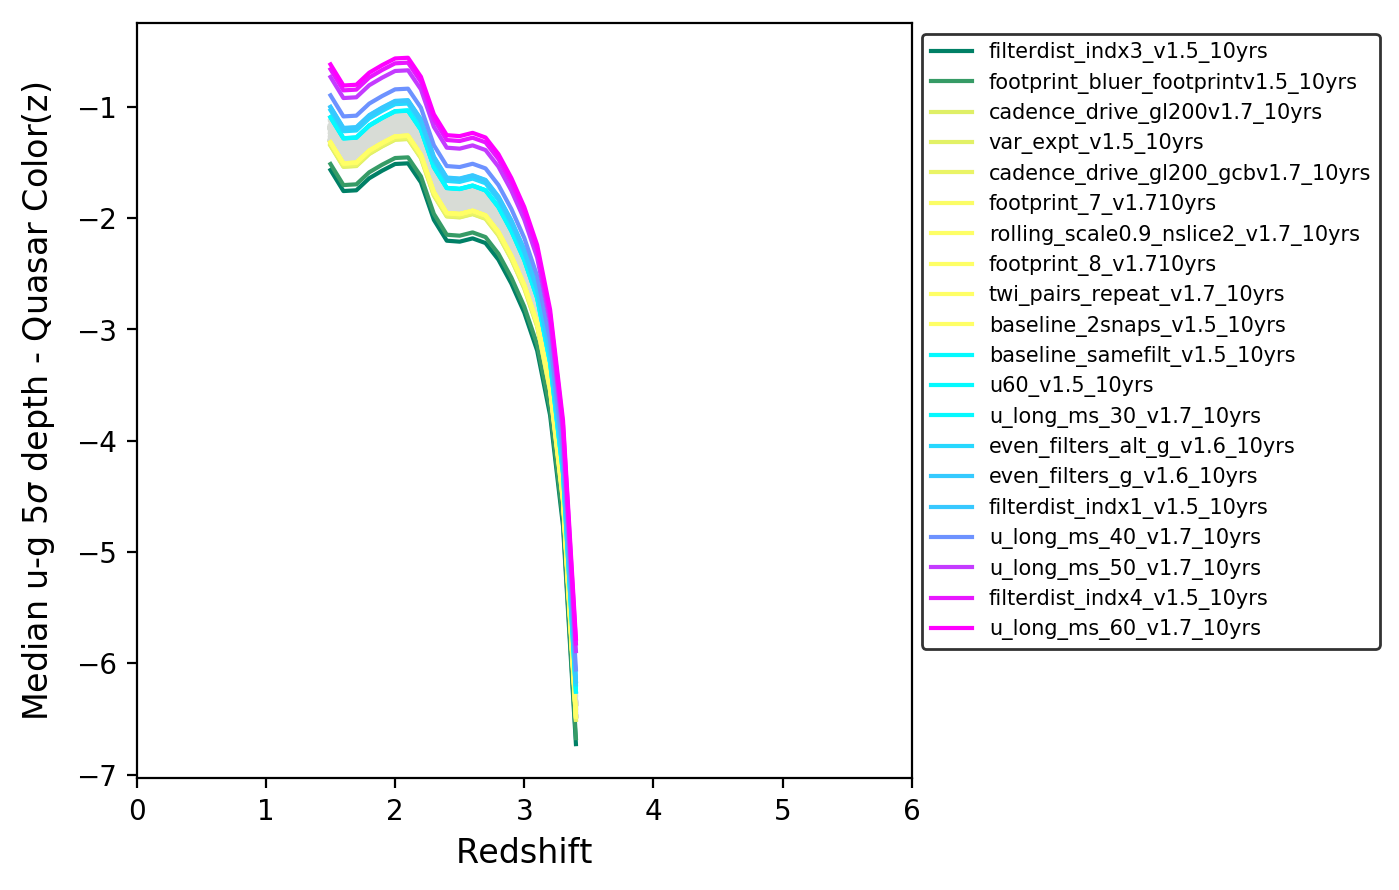

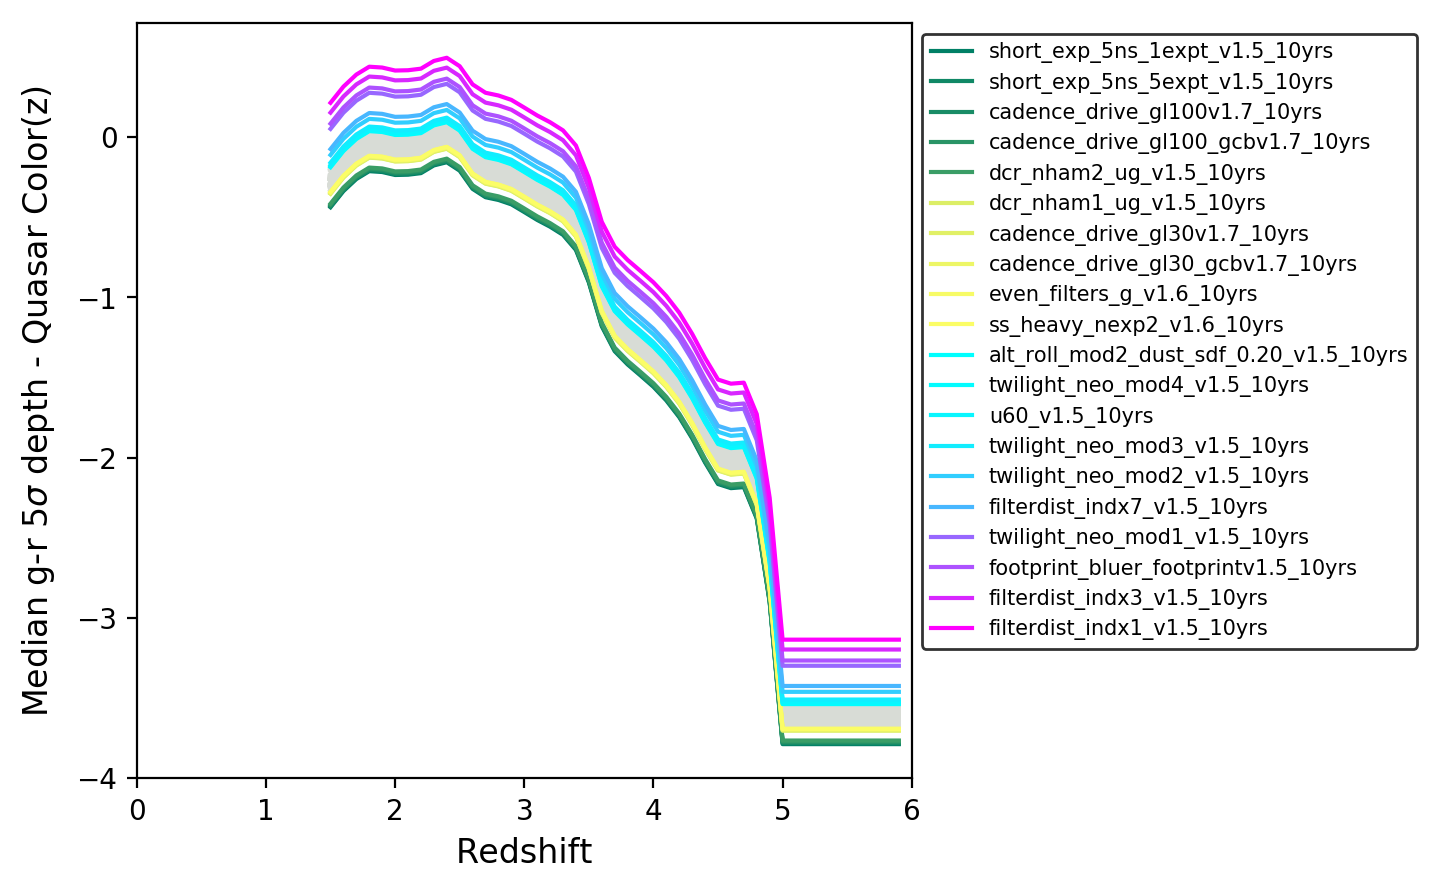

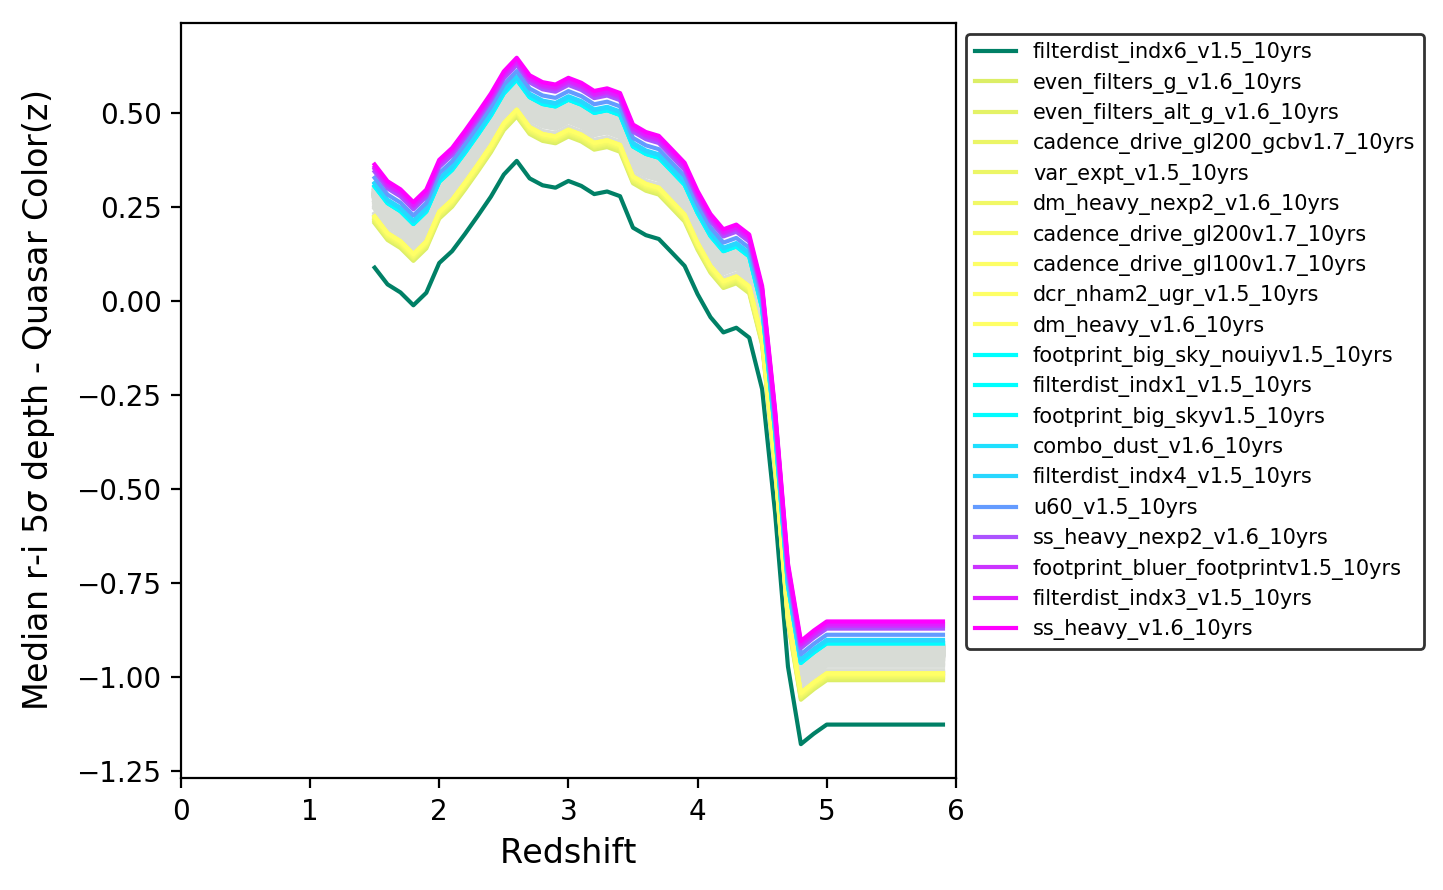

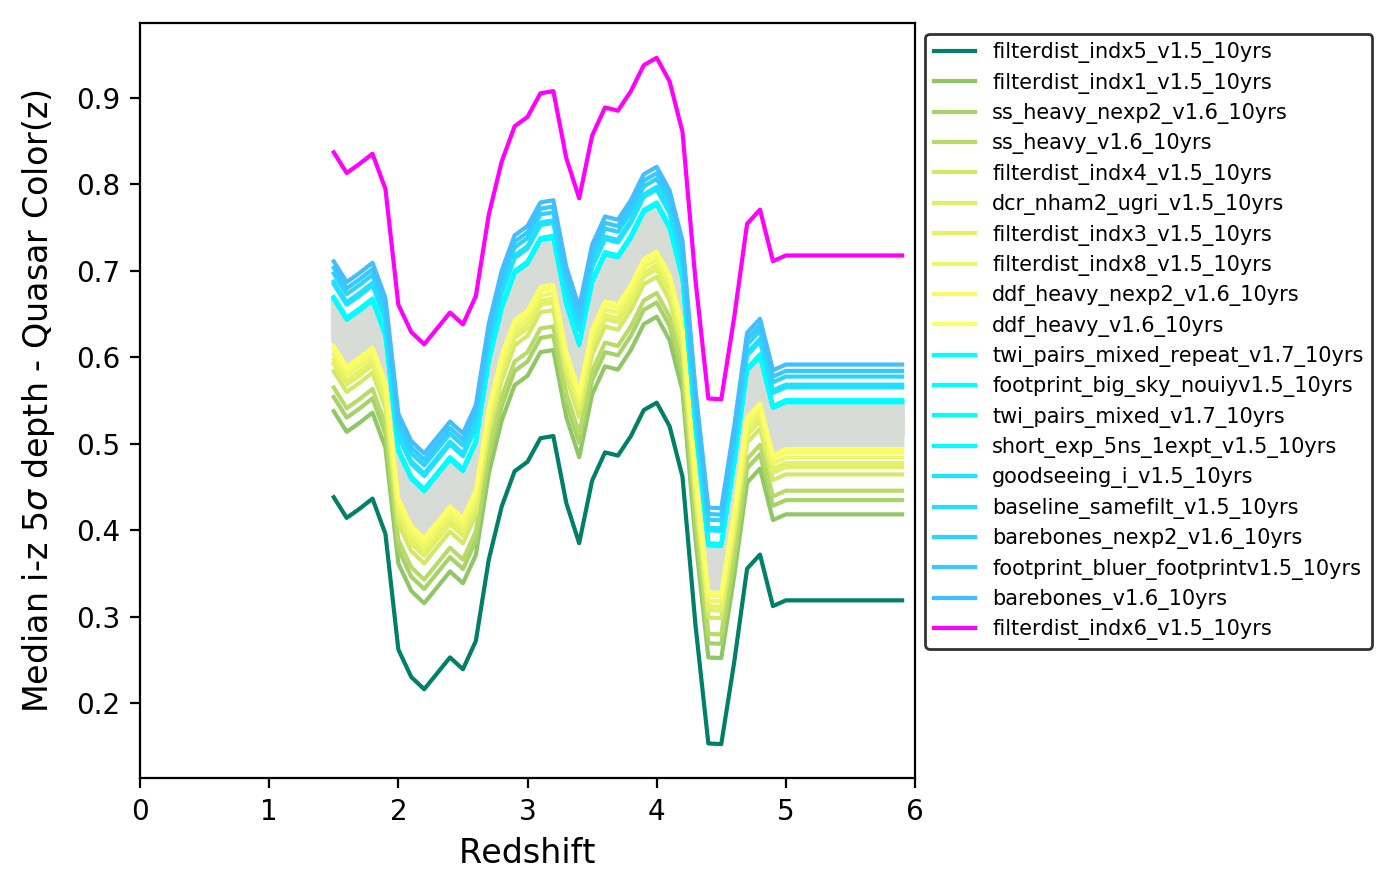

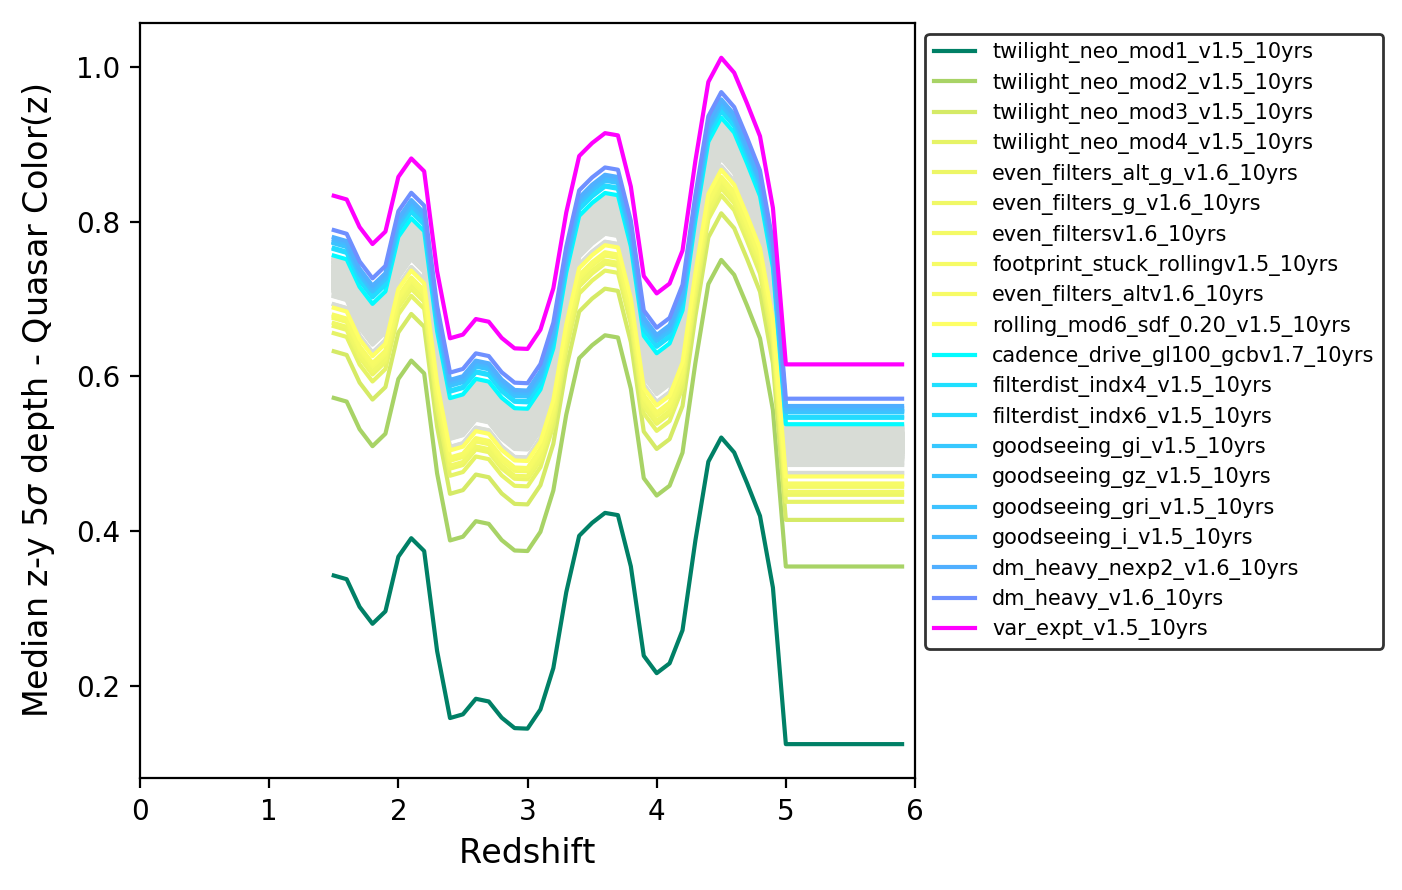

In [16]:
imag = 26.0
for Key in Keys:
    filter1 = Key[1][-7]
    filter2 = Key[1][-6]
    color_name = "{0}-{1}".format(filter1, filter2)
    quasar_colors = Temple_colors(color_name,zs,imag)
    ylabel = 'Median {} 5$\sigma$ depth - Quasar Color(z)'.format(color_name)
    plot_OpSims_color_excess_redshift_extremes(Key, bundleDicts, zs, quasar_colors,
                                               color_map_top=mpl.cm.cool,
                                               color_map_bottom=mpl.cm.summer,
                                               ylabel=ylabel, figsize=(5,5), 
                                               dpi=200, datamin=zmin, datamax=zmax,
                                               percentile=5)
    plot_fname = "{0}/Color_{1}{2}_imag{3}_Temple.png".format(plots_folder,filter1,filter2,imag)
    plt.savefig(plot_fname, dpi=200, bbox_inches='tight')